## Final Project Submission

Please fill out:
* Student name: Gabriel Blatstein
* Student pace: Part time
* Scheduled project review date/time: 
* Instructor name: Brandon Lewis
* Blog post URL:


The following jupyter notebook walks you through a data set of houses in King County, Washington. The following variables are contained within the data set:
1. id: unique identified for a house
2. Date: house was sold
3. Price: ***Our prediction target variable***
4. Bedrooms: Number of bedrooms in a home
5. Bathrooms: Number of bathrooms in a home
6. Sqft_livingsquare: Sqaure footage of the home
7. Sqft_lotsquare:  Squre footage of the lot the home is built on
8. Floors:  Number of floors (or levels) in the home
9. Waterfront: House which has a view to a waterfront
10. View: Number of times the home has been viewed
11. Condition: The overall condition of the home
12. Grade: Overall grade given to the housing unit, based on King County grading system
13. Sqft_above: Square footage of house without including the basement
14. Sqft_basement: Square footage of the basement
15. Yr_built: Year the house was built in
16. Yr_renovated: Year when house was renovated
17. Zipcode: Zip of the home
18. Lat: Latitude coordinate
19. Long: Longitude coordinate
20. Sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
21. Sqft_lot15: The square footage of the land lots of the nearest 15 neighbors


***We will be using the OSEMN Process:***

1. Obtain: Obtain the data from the relevant resources and stakeholders

2. Scrub: Cleaning the data into formats that can be digested in Python packackages such as Sklearn or Statsmodels Rememer the "Gargbage in, garbage out".

3. Explore: Using statistical methods and data analytic techniques explore the data to find significant patterns or trends

4. Model: Construct models to predict and forecast the data. Here we focus on our target variable which is price!

5. Interpret: Take the results of the analysis and model and create meaningful visualizations or presentations

    
    

# Data Obtaining

In [1]:
#Importing all necessary libriaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Modeling and Vaidation Libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
import statsmodels.api as sm 

First we will start by loading our data and having a quick look at some summary inforrmation

In [2]:
df=pd.read_csv('kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


I noticed a NaN value in waterfront and wanted to take a look at a few of the variables unique values. 

In [4]:
print('Water Front:' , df['waterfront'].unique())
print('View:' , df['view'].unique())
print('Bathrooms:' , df['bathrooms'].unique())
print('Bedrooms:' , df['bedrooms'].unique())
print('Condition' , df['condition'].unique())

Water Front: [nan  0.  1.]
View: [ 0. nan  3.  4.  2.  1.]
Bathrooms: [1.   2.25 3.   2.   4.5  1.5  2.5  1.75 2.75 3.25 4.   3.5  0.75 4.75
 5.   4.25 3.75 1.25 5.25 6.   0.5  5.5  6.75 5.75 8.   7.5  7.75 6.25
 6.5 ]
Bedrooms: [ 3  2  4  5  1  6  7  8  9 11 10 33]
Condition [3 5 4 1 2]


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


Intial Observations:

1. Sqft Basement and Date both need changes to be made to their data types. We will want to make date into a date time data type and Sqft basement into a numerical friendly type like float64

2. In addition we can start to identify some of the categorical variables. For example it looks like waterfront is coded with a 1 or a 0 for whether or not their is a waterfront view.




### Data Cleaning

First, we will check to see if there are any NaN or other weird data integrity issues going on.

In [7]:
df.isna().sum() #We see here that we will have to take a look at the following variables due to have Null or NaN values.

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

We see that there are three variables that have NaN values and need to be delt with. 

In [8]:
sum((df.yr_renovated==0))

17011

There are 17011 instances of yr_renovated being 0 therefore we will fill this variables NaN's with zeroes

As for view we will assume that setting view equal to 0 for the 63 instances will not weigh significantly on our data later on during modeling. 

As for waterfront, a 0 represents no view of waterfront and 1 represents a view of a waterfront. Therefore we will make the 2,376 records with NaN into zeroes also.

We will replace the three NaN affected variables with zeroes now. 

In [9]:
for i in df:
    df.replace(np.NaN, 0 , inplace=True)

I decided to replace all of the NaN values with the string 'NaN'

In [10]:
df.isna().sum() #cleaned all data, there are no more NaN's

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### Categorical Var Cleaning

Here is the start of breaking up our categorical variables and our numerical or quantitative variables. First we will have to decide which cat vars we will use one hot coding or if we will manually bin them. 

In [11]:
df_cat=df[['waterfront','condition','view','floors','zipcode','date','grade','yr_built','yr_renovated','bedrooms','bathrooms']]

df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
waterfront      21597 non-null float64
condition       21597 non-null int64
view            21597 non-null float64
floors          21597 non-null float64
zipcode         21597 non-null int64
date            21597 non-null object
grade           21597 non-null int64
yr_built        21597 non-null int64
yr_renovated    21597 non-null float64
bedrooms        21597 non-null int64
bathrooms       21597 non-null float64
dtypes: float64(5), int64(5), object(1)
memory usage: 1.8+ MB


In [12]:
#Cleaning variables to ensure categorical variables are not taken up as being numerical.
df_cat.loc[:,('waterfront')]= df['waterfront'].astype('category')
df_cat.loc[:,('condition')]= df['condition'].astype("category")
df_cat.loc[:,('view')]= df['view'].astype("category")
df_cat.loc[:,('floors')]= df['floors'].astype("category")
df_cat.loc[:,('zipcode')]= df['zipcode'].astype("category")
df_cat.loc[:,('grade')] = df['grade'].astype('category')
df_cat.loc[:,('yr_built')] = df['yr_built'].astype('category')
df_cat.loc[:,('bedrooms')]= df['bedrooms'].astype('category')
df_cat.loc[:,('bathrooms')]= df['bathrooms'].astype('category')
df_cat.loc[:,('yr_renovated')]=df['yr_renovated'].astype('category')

/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
waterfront      21597 non-null category
condition       21597 non-null category
view            21597 non-null category
floors          21597 non-null category
zipcode         21597 non-null category
date            21597 non-null object
grade           21597 non-null category
yr_built        21597 non-null category
yr_renovated    21597 non-null category
bedrooms        21597 non-null category
bathrooms       21597 non-null category
dtypes: category(10), object(1)
memory usage: 394.7+ KB


One hot coding will not work for any variables with data that has many unique values because then we would have way too many rows

Therefore, we will code a few of our variables using binning techiniques.

In [15]:
df['yr_built'].describe()

count    21597.000000
mean      1970.999676
std         29.375234
min       1900.000000
25%       1951.000000
50%       1975.000000
75%       1997.000000
max       2015.000000
Name: yr_built, dtype: float64

In [16]:
bins = [1900,1910,1920,1930,1940,1950,1960,1970,1980,1990,2000,2015] 
year = ['1900-1910','1910-1920','1920-1930','1930-1940','1940-1950','1950-1960','1960-1970','1970-1980','1980-1990','1990-2000','2000-2015']
df_cat['yr_built_new']=pd.cut(df_cat['yr_built'], bins= bins, labels=year)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [17]:
df_cat.head()
#Check to make sure our new binned variable worked. 

,waterfront,condition,view,floors,zipcode,date,grade,yr_built,yr_renovated,bedrooms,bathrooms,yr_built_new
0,0.0,3,0.0,1.0,98178,10/13/2014,7,1955,0.0,3,1.00,1950-1960
1,0.0,3,0.0,2.0,98125,12/9/2014,7,1951,1991.0,3,2.25,1950-1960
2,0.0,3,0.0,1.0,98028,2/25/2015,6,1933,0.0,2,1.00,1930-1940
3,0.0,5,0.0,1.0,98136,12/9/2014,7,1965,0.0,4,3.00,1960-1970
4,0.0,3,0.0,1.0,98074,2/18/2015,8,1987,0.0,3,2.00,1980-1990


We will do the same for year renovated! But instead of binning by year we will bin by whether or not the house was ever renovated. 

In [18]:
df_cat=df_cat.drop('yr_built',axis=1)

In [19]:
bins1 = [-1,0,df.yr_renovated.max()] 
year1 = ['0','1']
df_cat['yr_renovated']=pd.cut(df_cat['yr_renovated'], bins= bins1, labels=year1)

In [20]:
df_cat.head()

,waterfront,condition,view,floors,zipcode,date,grade,yr_renovated,bedrooms,bathrooms,yr_built_new
0,0.0,3,0.0,1.0,98178,10/13/2014,7,0,3,1.00,1950-1960
1,0.0,3,0.0,2.0,98125,12/9/2014,7,1,3,2.25,1950-1960
2,0.0,3,0.0,1.0,98028,2/25/2015,6,0,2,1.00,1930-1940
3,0.0,5,0.0,1.0,98136,12/9/2014,7,0,4,3.00,1960-1970
4,0.0,3,0.0,1.0,98074,2/18/2015,8,0,3,2.00,1980-1990


In [21]:
dummies=df_cat[['waterfront','condition','view','floors','grade','bedrooms','zipcode','bathrooms','yr_built_new','yr_renovated']]
dummy_cat=pd.get_dummies(dummies,dtype='int64')

In [22]:
dummy_cat.head()

,waterfront_0.0,waterfront_1.0,condition_1,condition_2,condition_3,condition_4,condition_5,view_0.0,view_1.0,view_2.0,...,yr_built_new_1930-1940,yr_built_new_1940-1950,yr_built_new_1950-1960,yr_built_new_1960-1970,yr_built_new_1970-1980,yr_built_new_1980-1990,yr_built_new_1990-2000,yr_built_new_2000-2015,yr_renovated_0,yr_renovated_1
0,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,1
2,1,0,0,0,1,0,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0
4,1,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,1,0


The last thing that needs to be done is the dat needs to be changed to a date time object.  This can easily be done with the following method, pd.to_datetime()

In [23]:
df_date=pd.to_datetime(df_cat.date)

In [25]:
#STILL NEED TO JOIN THE DATE INTO DUMMY DF
concat=[dummy_cat,df_date]
df_cat_final= pd.concat(concat, axis=1)
df_cat_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Columns: 154 entries, waterfront_0.0 to date
dtypes: datetime64[ns](1), int64(153)
memory usage: 25.4 MB


### Numerical Data Cleaning

In [26]:
df_num= df[['price','sqft_living','sqft_lot','sqft_basement','sqft_lot15']]

We noticed earlier that we had a question mark in our sqft_basement so we are going to handle that situation now by replacing it with a zero.

In [27]:
df_num['sqft_basement'].replace(to_replace='?', value= 0, inplace=True)
# df[df['sqft_basement']=='?']= '0'
df_num.loc[:,('sqft_basement')]=df_num['sqft_basement'].astype('float64')


/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [28]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 5 columns):
price            21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
sqft_basement    21597 non-null float64
sqft_lot15       21597 non-null int64
dtypes: float64(2), int64(3)
memory usage: 843.7 KB


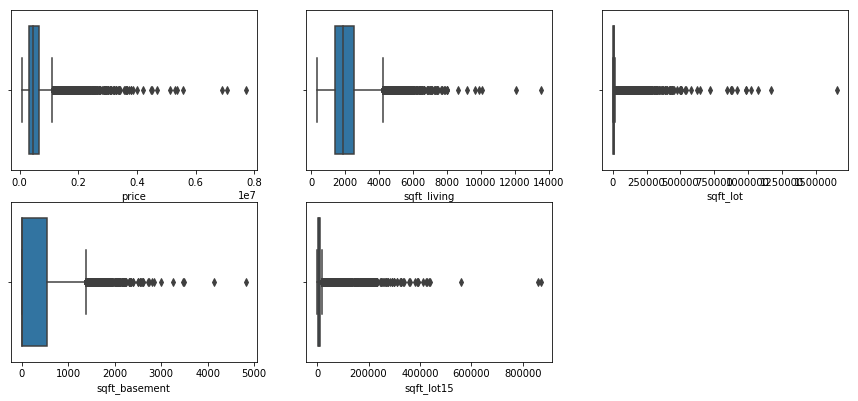

In [29]:
#Now we want to look for outliers in our numerical data

plt.figure(figsize=(15,10))
plt.subplot(331)
sns.boxplot(df_num['price'])
plt.subplot(332)
sns.boxplot(df_num['sqft_living'])
plt.subplot(333)
sns.boxplot(df_num['sqft_lot'])
plt.subplot(334)
sns.boxplot(df_num['sqft_basement'])
plt.subplot(335)
sns.boxplot(df_num['sqft_lot15'])




Here we are going to take out outliers we saw in our data and from analysis done prior.

In [30]:
df_num_final=df_num.loc[df_num['price']<=1500000,:]
df_num_final=df_num.loc[df_num['sqft_living']<= 5000,:]
df_num_final=df_num.loc[df_num['sqft_lot']<= 150000,:]
df_num_final=df_num.loc[df_num['sqft_lot15']<= 150000,:]
df_num_final=df_num.loc[df_num['sqft_basement']<= 1800,:]


In [31]:
#Double Check variables got changed
df_num.info()
#We see that we now only have 20334 data points for each variable


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 5 columns):
price            21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
sqft_basement    21597 non-null float64
sqft_lot15       21597 non-null int64
dtypes: float64(2), int64(3)
memory usage: 843.7 KB


In [32]:
#seperating out the target variable
targ_var=df_num['price']

df_num_final=df_num

We are not going to look at the distros of sqft_living15 or sqft_above becuase due to multicollinearity they will be dropped later on in this notebook.

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'Sqft Basement Distribution')

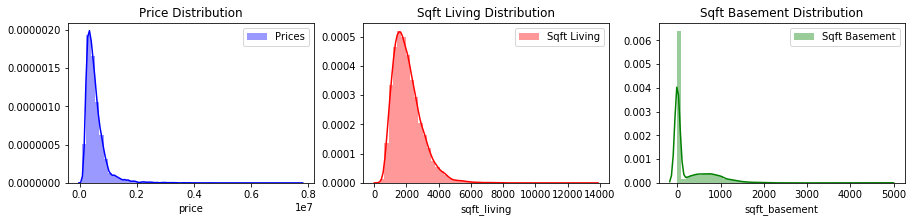

In [33]:
# fig, axes = plt.subplots(nrows=4, ncols=4)
plt.figure(figsize=(15,10))
plt.subplot(331)
sns.distplot(targ_var, label='Prices',color='blue')
plt.title('Price Distribution')
plt.legend()
plt.subplot(332)
sns.distplot(df_num.sqft_living, label='Sqft Living',color='red')
plt.title('Sqft Living Distribution')
plt.legend()
plt.subplot(333)
sns.distplot(df_num.sqft_basement, label='Sqft Basement', color='green')
plt.legend()
plt.title('Sqft Basement Distribution')


Text(0.5, 1.0, 'Sqft Lot15 Distribution')

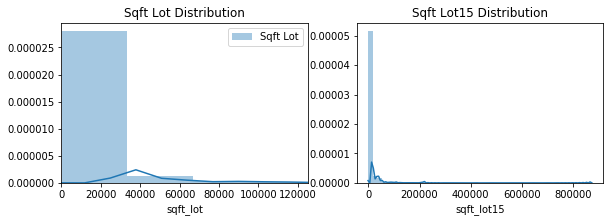

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(334)
sns.distplot(df_num.sqft_lot, label='Sqft Lot')
plt.title('Sqft Lot Distribution')
plt.xlim(0,125000)
plt.legend()
plt.subplot(335)
sns.distplot(df_num.sqft_lot15, label='Sqft Lot15')
plt.title('Sqft Lot15 Distribution')




In [39]:
# price = np.log(df_num.price)
df_num_final.sqft_living = np.log(df_num_final.sqft_living)
df_num_final.sqft_lot = np.log(df_num_final.sqft_lot)
df_num_final.sqft_lot15= np.log(df_num_final.sqft_lot15)
# plt.figure(figsize=(10,4))

# sns.distplot(sqft_living, label='Sqft Living')
# sns.distplot(sqft_lot, label='Sqft Lot')
# sns.distplot(sqft_lot15, label='Sqft Lot15')
# plt.legend()
df_num_final.head()

,price,sqft_living,sqft_lot,sqft_basement,sqft_lot15
0,221900.0,-0.398887,-0.263432,0.0,-0.263432
1,538000.0,-0.324266,-0.246589,400.0,-0.243093
2,180000.0,-0.448273,-0.226080,0.0,-0.239606
3,604000.0,-0.348326,-0.272097,910.0,-0.272097
4,510000.0,-0.362873,-0.239463,0.0,-0.244265


In [40]:
# targ_var = ( price - min(price) ) / ( max(price) - min(price) )
df_num_final['sqft_living'] = ( sqft_living - min(sqft_living) ) / ( max(sqft_living) - min(sqft_living) )
df_num_final['sqft_lot'] = ( sqft_lot - min(sqft_lot) ) / ( max(sqft_lot) - min(sqft_lot) )

NameError: name 'sqft_living' is not defined

In [40]:
#Now we will normalize some data
from sklearn import preprocessing

# df_num_log=np.log(df_num)

# scaler = preprocessing.StandardScaler()
# scaled_df = scaler.fit_transform(df_num_final)
# scaled_df = pd.DataFrame(scaled_df, columns= ['sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15'] )

# scaled_df.head()
# scaled_df.info()






<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20467 entries, 0 to 20466
Data columns (total 8 columns):
sqft_living      20467 non-null float64
sqft_lot         20467 non-null float64
sqft_above       20467 non-null float64
sqft_basement    20467 non-null float64
lat              20467 non-null float64
long             20467 non-null float64
sqft_living15    20467 non-null float64
sqft_lot15       20467 non-null float64
dtypes: float64(8)
memory usage: 1.2 MB


/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [41]:
df_final= df_cat_final.join(df_num_final,how='inner')
df_final.describe()

,waterfront_0.0,waterfront_1.0,condition_1,condition_2,condition_3,condition_4,condition_5,view_0.0,view_1.0,view_2.0,...,yr_built_new_1980-1990,yr_built_new_1990-2000,yr_built_new_2000-2015,yr_renovated_0,yr_renovated_1,price,sqft_living,sqft_lot,sqft_basement,sqft_lot15
count,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,...,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000
mean,0.993240,0.006760,0.001343,0.007871,0.649164,0.262861,0.078761,0.902209,0.015280,0.044312,...,0.109182,0.098764,0.210122,0.965551,0.034449,5.402966e+05,-0.353582,-0.245636,285.716581,-0.246489
std,0.081944,0.081944,0.036620,0.088373,0.477243,0.440198,0.269372,0.297039,0.122667,0.205792,...,0.311874,0.298351,0.407404,0.182384,0.182384,3.673681e+05,0.040200,0.057103,439.819830,0.051657
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,7.800000e+04,-0.553280,-0.500777,0.000000,-0.469794
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,3.220000e+05,-0.378811,-0.271524,0.000000,-0.270675
50%,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,4.500000e+05,-0.350719,-0.243273,0.000000,-0.243256
75%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,6.450000e+05,-0.324934,-0.222047,550.000000,-0.225574
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,7.700000e+06,-0.208095,-0.021353,4820.000000,-0.039203


# Exploring Data

### Multicollinearity

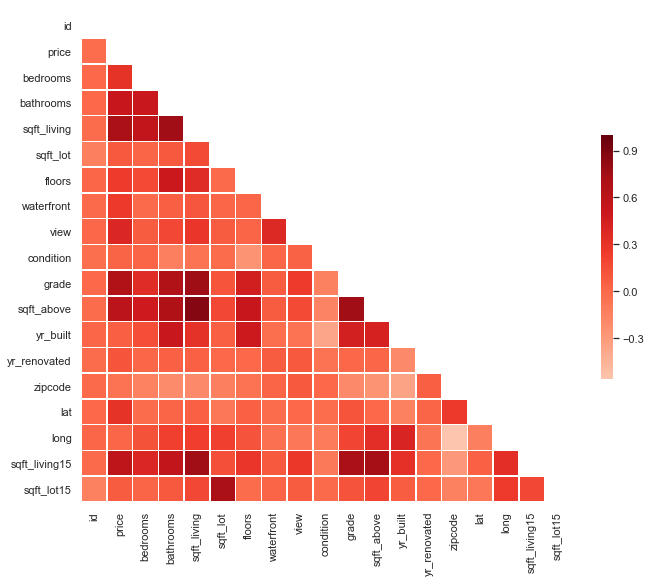

In [69]:
# Set the style of the visualization
sns.set(style="white")

# Create a covariance matrix
corr = df.corr()

# Generate a mask the size of our covariance matrix
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=plt.cm.Reds,center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We are going to drop sqft_living15 and sqft_above due to multicollinearity.

In [42]:
df_final=df_final.drop(['sqft_living15','sqft_above','lat','long'],axis=1)

KeyError: "['sqft_living15' 'sqft_above' 'lat' 'long'] not found in axis"

In [ ]:
# ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','lat','long','sqft_living15','sqft_lot15']

## EDA

The following questions will be answered below with a meaningful explanation for each:

    1. What zipcode has the most expensive houses? Also which area is the cheapest?
    2. What day of the week do most houses sell?
    3. What year sold the most houses? Also, zero in on the 2009 financial crisis and look at that.
    4. What sort of affect does a waterfront view have on the price of the house?

#### Question 1: What zipcode has the most expensive houses? Which has the cheapest?

In [87]:
df.zipcode.unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

In [88]:
df_zipcode= df.groupby('zipcode')['price'].mean()

In [90]:
zip_max=df_zipcode.sort_values(ascending=False)
zip_max

zipcode
98039    2.161300e+06
98004    1.356524e+06
98040    1.194874e+06
98112    1.096239e+06
98102    8.996077e+05
98109    8.800778e+05
98105    8.632289e+05
98006    8.599386e+05
98119    8.497148e+05
98005    8.102897e+05
98033    8.039908e+05
98199    7.921879e+05
98075    7.907347e+05
98074    6.856758e+05
98077    6.828860e+05
98053    6.772150e+05
98177    6.764194e+05
98008    6.456282e+05
98052    6.452442e+05
98122    6.345581e+05
98115    6.199441e+05
98116    6.186951e+05
98007    6.172540e+05
98027    6.170540e+05
98029    6.126427e+05
98144    5.947065e+05
98024    5.861209e+05
98103    5.850488e+05
98107    5.791098e+05
98117    5.768348e+05
             ...     
98014    4.556171e+05
98045    4.402323e+05
98019    4.248151e+05
98126    4.247346e+05
98155    4.237369e+05
98010    4.236660e+05
98056    4.208955e+05
98118    4.180194e+05
98133    3.870116e+05
98038    3.670915e+05
98146    3.594963e+05
98108    3.556785e+05
98058    3.536191e+05
98092    3.349211e+05
98

Text(0, 0.5, 'Price (Dollars)')

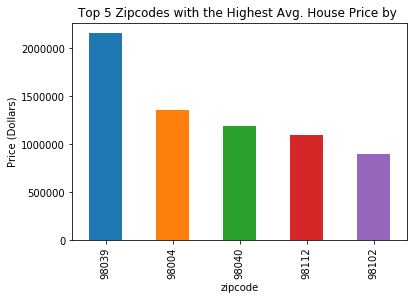

In [99]:
zip_max[0:5].plot.bar(x=['zipcode'],y=['price'])
plt.title('Top 5 Zipcodes with the Highest Avg. House Price by ')
plt.ylabel('Price (Dollars)')

Text(0, 0.5, 'Price (Dollars)')

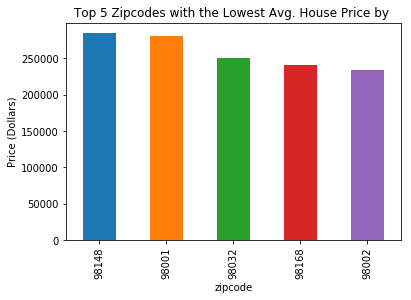

In [101]:
zip_max[-5:].plot.bar(x=['zipcode'],y=['price'])
plt.title('Top 5 Zipcodes with the Lowest Avg. House Price by ')
plt.ylabel('Price (Dollars)')

#### Question 2: What day do most houses sell on?

In [4]:
date=pd.to_datetime(df.date)

In [5]:
day_of_week= date.dt.day_name()

In [47]:
graph_day=day_of_week.groupby(day_of_week).count()

In [50]:
dict_day=graph_day
dict_day

date
Friday       3684
Monday       4097
Saturday      287
Sunday        230
Thursday     3989
Tuesday      4710
Wednesday    4600
Name: date, dtype: int64

In [73]:
days=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
count=[4097,4710,4600,3989,3684,287,230]

Text(0, 0.5, 'Day of Week')

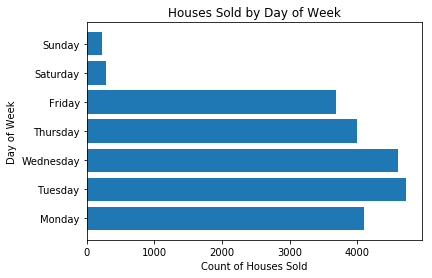

In [87]:
fig, ax = plt.subplots()
plt.barh(days,count)
plt.title('Houses Sold by Day of Week')
plt.xlabel('Count of Houses Sold')
plt.ylabel('Day of Week')

We see here the weekend (Saturday and Sunday) are least likely have a house sold. With Tuesday (4710) and Wednesday (4600) coming in first and second respectively.

#### 3. What year sold the most houses? Also, zero in on the 2009 financial crisis and look at that.
   

In [103]:
year= pd.to_datetime(df.date)
year_sold=year.dt.year
graph_year=year_sold.groupby(year_sold).count()
graph_year

df.date.unique()

array(['10/13/2014', '12/9/2014', '2/25/2015', '2/18/2015', '5/12/2014',
       '6/27/2014', '1/15/2015', '4/15/2015', '3/12/2015', '4/3/2015',
       '5/27/2014', '5/28/2014', '10/7/2014', '1/24/2015', '7/31/2014',
       '5/29/2014', '12/5/2014', '4/24/2015', '5/14/2014', '8/26/2014',
       '7/3/2014', '5/16/2014', '11/20/2014', '11/3/2014', '6/26/2014',
       '12/1/2014', '6/24/2014', '3/2/2015', '11/10/2014', '12/3/2014',
       '6/13/2014', '12/30/2014', '2/13/2015', '6/20/2014', '7/15/2014',
       '8/11/2014', '7/7/2014', '10/28/2014', '7/29/2014', '7/18/2014',
       '3/25/2015', '7/16/2014', '4/28/2015', '3/11/2015', '9/16/2014',
       '2/17/2015', '12/31/2014', '2/5/2015', '3/3/2015', '8/19/2014',
       '4/7/2015', '8/27/2014', '2/23/2015', '12/10/2014', '8/28/2014',
       '10/21/2014', '12/7/2014', '6/3/2014', '9/9/2014', '10/9/2014',
       '8/25/2014', '6/12/2014', '9/12/2014', '1/5/2015', '6/10/2014',
       '7/10/2014', '3/16/2015', '11/5/2014', '4/20/2015', '6/9/20

It appears the data only has dates 2014 and 2015 where houses were sold. Thus our question can not be answered.

3.a. Alternative question: 

####  4. What sort of affect does a waterfront view have on the price of the house?

Text(0, 0.5, 'Price')

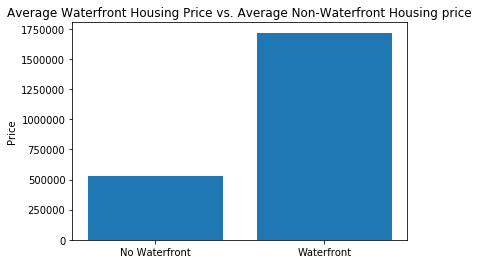

In [72]:
df_price_waterfront=df[['waterfront','price']]
plt.bar(['No Waterfront','Waterfront'],df_price_waterfront.groupby('waterfront')['price'].mean())
plt.title('Average Waterfront Housing Price vs. Average Non-Waterfront Housing price')
plt.ylabel('Price')

In [82]:
statistic_waterfront=df_price_waterfront.groupby('waterfront')['price'].mean()
print('On average, having a waterfront property increases property value by ', round((statistic_waterfront[1]-statistic_waterfront[0])/(statistic_waterfront[0])*100,2),'%')

On average, having a waterfront property increases property value by  222.61 %


In [79]:
###Double check the percentage change

222.61

### More Data Exploration

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


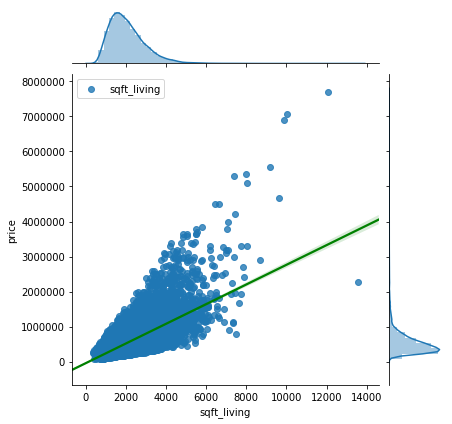

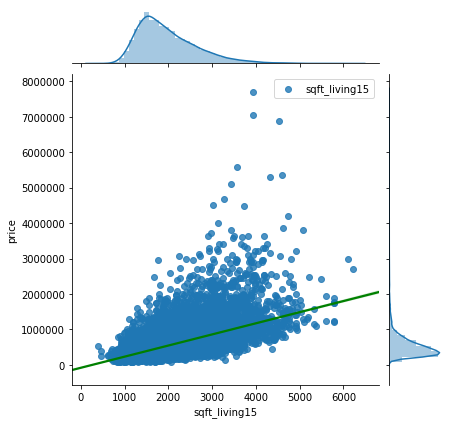

In [85]:
for column in ['sqft_living','sqft_living15']:
    sns.jointplot(x=column, y="price",
                  data=df, 
                  kind='reg', 
                  label=column,
                  joint_kws={'line_kws':{'color':'green'}})
#     sns.regplot(walmart[column], walmart.Weekly_Sales, label=column)
    plt.legend()
    plt.show()

In [26]:
# df_w_dummies=pd.get_dummies(df_new)
# df_w_dummies.describe()

# Modeling Data

In [74]:
# import statsmodels.formula.api as smf

# col_names = df_num_final.describe().columns
# results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
# for idx, val in enumerate(col_names):
#     print ("Housing: price~" + val)
#     print ("------------------------------")

#     f = 'price~' + val
#     model = smf.ols(formula=f, data=df_num_final).fit()
#     X_new = pd.DataFrame({val: [df_num_final[val].min(), df_num_final[val].max()]});
#     preds = model.predict(X_new)
#     results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
#     print(results[idx+1])

In [28]:
# pd.DataFrame(results)

In [95]:

# import statsmodels.formula.api as smf

# col_names = model.describe().columns.drop('price',axis=1)
# results = [['ind_var', 'r_squared', 'intercept', 'slope', 'p-value' ]]
# for idx, val in enumerate(col_names):
#     print ("price~" + val)
#     print ("------------------------------")

#     f = 'price~' + val
#     model = smf.ols(formula=f, data=model
#     X_new = pd.DataFrame({val: [model[val].min(), model[val].max()]});
#     preds = model.predict(X_new)
#     results.append([val, model.rsquared, model.params[0], model.params[1], model.pvalues[1] ])
#     print(results[idx+1])


In [79]:
# pd.DataFrame(results)

,0,1,2,3,4
0,ind_var,r_squared,intercept,slope,p-value


In [49]:
# model=df_final.astype('int64')

In [90]:
# df_model=df_final.drop('date',axis=1)

In [92]:
# df_model=df_model.astype('int64')

In [94]:
# import statsmodels.api as sm
# from statsmodels.formula.api import ols
# outcome = model['price']
# predictors = model.drop('price',axis=1)
# pred_sum = "+".join(predictors.columns)
# formula = outcome + "~" + pred_sum

In [93]:
# model = ols(formula= formula, data= df_final).fit()
# model.summary()

In [43]:
y = targ_var
X = df_final.drop(['price','date'],axis=1)


In [44]:
def linear_regression(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    
    # Errors
    print('R^2 Score:',round(linreg.score(X, y),2))
    print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),5))
    print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),5))
    print('-----------------------------------')
    print('Average Predicted Price:', round(y_pred.mean(),4))
    print('Average Actual Price:', round(y_test.mean(), 4))
    

def cross_validation(X, y, cv=15, show_scores=False):
    linreg= LinearRegression()
    score = cross_val_score(linreg, X, y, cv=cv, scoring="r2")
    print('Model Accuracy:',round(sum(score)/len(score),2)*100, '%')
    print(score) if show_scores else False
    
def feature_selection(X, y):
    est = sm.OLS(y, X).fit()
    pvalues = pd.DataFrame(est.pvalues, columns=['p'])
    features = list(pvalues[pvalues.p < 0.05].index)
    return features

In [45]:
linear_regression(X,y)

R^2 Score: -661994.7
Mean Absolute Error: 6736925.01066
Root Mean Squared Error: 520273674.51288
-----------------------------------
Average Predicted Price: -6105995.2216
Average Actual Price: 539037.2567


In [46]:
cross_validation(X, y, cv=15, show_scores=False)

Model Accuracy: -142843905.0 %


In [47]:
significant_features = feature_selection(X, y)
print('Significant features:',len(significant_features),'\nAll features:',len(X.columns))

Significant features: 134 
All features: 157


In [72]:
selector.ranking_

array([131, 132,   1,   1,   1,   1,   1, 123, 122, 121, 124, 120, 127,
       126, 128, 125, 129, 130, 109, 117, 113, 111, 112, 114, 115, 116,
       110, 118, 119, 104, 102, 103, 105, 101, 106, 107,  98, 100,  99,
       108,  97,  60,  63,  66,  14,  22,  48,  43,  55,  41,  15,  31,
        61,  32,   5,   1,  27,  52,  16,  35,  53,  62,  12,  36,   8,
        68,  25,  59,  30,  51,  49,  29,  28,  21,   4,  10,  26,  38,
         2,  39,  11,  18,  65,  33,   1,  24,  64,  57,   1,  19,  40,
        47,   7,  50,   9,   1,  37,  34,  44,   6,  67,  58,   3,  23,
        54,  56,  13,  20,   1,  42,  17,  95,  76,  81,  73,  88,  80,
        77,  86,  79,  82,  78,  84,  75,  83,  87,  74,  89,  93,  91,
        72,  85,  71,  92,  69, 135,  94,  90,  96,  70, 138, 139, 148,
       140, 147, 145, 141, 144, 142, 146, 143,  45,  46, 133, 151, 149,
       152, 134, 137, 136, 150])

In [73]:
estimators = selector.estimator_
print(estimators.coef_)


[1.47224105e+17 1.47224105e+17 1.47224105e+17 1.47224105e+17
 1.47224105e+17 3.61032500e+04 3.01360000e+04 2.69085000e+04
 2.97520000e+04 2.59690000e+04]


In [74]:
linreg.score(X,y)

0.5882088582166325

In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [91]:
X=df_final.drop(['date','price'],axis=1)
y=targ_var

In [92]:
nof_list=np.arange(1,20)
high_score=0

#variable to sore the optimum features
nof=0
score_list=[]

for n in range (len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size= .3, random_state = 0)
    model = LinearRegression()
    rfe=RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe= rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if (score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))
        

Optimum number of features: 19
Score with 19 features: 0.238582


In [61]:
cols = list(X.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 5)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['view_0.0', 'view_1.0', 'view_2.0', 'view_3.0', 'view_4.0'], dtype='object')


Test train split for sklearn......

Feature selection........to improve model and do feature elimination 


### TO DO

1. Clean up jupyter notebook
2. Decide on what three-four visuals we want to include 
    a. Put together slide show
3. Blog Post

### Questions for Brandon

1. Do we have to bin?
2. I feel like its cheating to log so many variables you are just manipulating the data to say what you want to?
    a. Is there a certain level of Kurtosis you are looking for? Something around 3?
    b. Same goes for Skewness?
3. Do we have to make categorical variables into dummies or does the statsmodels package already deal with them in a certain way?


# Interpretation of Data